# Apply Model to area of interest
Produces predicted areas from training model.

In [1]:
import json
import joblib
import geopandas as gpd
import pandas as pd
from shapely.geometry import shape, box, mapping, Point, Polygon

### import geojson and read in as dict, then as gdf

In [86]:
# import output from notebook 3 
with open(r"P:\AFG\GEO\Team\Projects\OSM_Completeness\20200910_AFLC\kabul_output575_AFLC_multiclass_20200911.json",'r') as data:
    x = json.load(data)

In [87]:
polygons=[]
for feature in x['features']:
    g = shape(feature['geometry']).buffer(0)
    polygons.append(g)
print(len(polygons))

76046


In [11]:
def returnFeatureVals(featureString, variable):
    return [x['properties'][featureString] for x in variable['features']]

In [90]:
applyFeatureDict = {
    'ndbi':returnFeatureVals('ndbi', x),
    'ndvi':returnFeatureVals('ndvi', x),
    'savi':returnFeatureVals('savi', x),
    'ui':returnFeatureVals('ui', x),
    'viirs':returnFeatureVals('viirs', x),
    'slope':returnFeatureVals('slope', x),
    'texture':returnFeatureVals('texture',x),
    'popWP':returnFeatureVals('popWP',x),
    'popGUF':returnFeatureVals('popGUF',x),
    'lc_built':returnFeatureVals('lc_built',x),
    'lc_crop':returnFeatureVals('lc_crop',x),
    'lc_grass':returnFeatureVals('lc_grass',x),
    'lc_tree':returnFeatureVals('lc_tree',x),
    'lc_shrub':returnFeatureVals('lc_shrub',x),
    'lc_sparseveg':returnFeatureVals('lc_sparseveg',x),
    'lc_soil':returnFeatureVals('lc_soil',x),
    'lc_snow':returnFeatureVals('lc_snow',x),
    'lc_water':returnFeatureVals('lc_water',x),
    'area':returnFeatureVals('area',x)
}
applyDF = pd.DataFrame.from_dict(applyFeatureDict)
applyGeoDF = gpd.GeoDataFrame(applyDF,crs = 4326, geometry=polygons)
applyGeoDF = applyGeoDF.fillna(0)

### import the model from step 1

In [91]:
# make sure to import the correct model 
filename = r"P:\AFG\GEO\Team\Projects\OSM_Completeness\20200910_AFLC\trainedAfg575_AFLC_multiclass_all.sav"
model = joblib.load(filename)

In [92]:
applyGeoDF

,ndbi,ndvi,savi,ui,viirs,slope,texture,popWP,popGUF,lc_built,lc_crop,lc_grass,lc_tree,lc_shrub,lc_sparseveg,lc_soil,lc_snow,lc_water,area,geometry
0,72.610,73.776,110.641,-5.543,0.113,15.455,-1.999,2.351,0,0,0,621,0,0,0,0,0,0,0.0,"POLYGON ((68.83211 34.50047, 68.83483 34.50047..."
1,74.323,75.784,113.656,-1.678,0.115,13.347,-3.853,4.192,0,0,0,609,0,0,0,0,0,0,0.0,"POLYGON ((68.83211 34.49822, 68.83483 34.49822..."
2,14.636,54.584,81.861,-66.348,0.111,14.369,-11.801,4.512,0,0,0,573,0,0,0,34,0,0,0.0,"POLYGON ((68.83212 34.49596, 68.83484 34.49597..."
3,3.767,38.548,57.811,-77.556,0.112,16.554,-8.022,2.377,0,0,0,332,0,0,0,312,0,0,0.0,"POLYGON ((68.83212 34.49371, 68.83484 34.49371..."
4,47.716,58.064,87.082,-22.880,0.112,10.512,-6.964,3.658,0,0,0,501,0,0,0,115,0,0,0.0,"POLYGON ((68.83212 34.49145, 68.83485 34.49146..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76041,-124.585,338.683,507.955,-268.956,0.109,13.024,-5.148,1.363,0,0,0,0,616,0,0,0,0,0,0.0,"POLYGON ((69.94352 34.77198, 69.94625 34.77196..."
76042,-90.548,298.428,447.581,-218.343,0.088,11.511,-7.418,1.693,0,0,0,290,348,0,0,0,0,0,0.0,"POLYGON ((69.94349 34.76972, 69.94622 34.76970..."
76043,-102.779,285.876,428.749,-238.457,0.082,13.713,-8.733,1.834,0,0,0,117,504,0,0,0,0,0,0.0,"POLYGON ((69.94346 34.76747, 69.94620 34.76745..."
76044,-93.554,243.545,365.263,-219.621,0.088,16.012,-7.955,3.323,0,0,0,89,508,0,0,0,0,0,0.0,"POLYGON ((69.94344 34.76522, 69.94617 34.76519..."


In [93]:
applyFeatureDF = applyGeoDF[['ndbi','ndvi','savi','ui','viirs','slope','texture','popWP','popGUF','lc_built','lc_crop','lc_grass','lc_tree', 'lc_shrub','lc_sparseveg', 'lc_soil','lc_snow','lc_water']]
applyTargetDF = applyGeoDF['area']

In [94]:
y_apply = model.predict(applyFeatureDF)

In [95]:
# iterate through the features in x, which is a dict object
for i,feature in enumerate(x['features']):
    # x becomes 
    area = x['features'][i]['properties']['area']
    feature['properties'] = {}
    feature['properties']['parea'] = y_apply[i]
    feature['properties']['builtArea'] = area

In [96]:
with open(r"P:\AFG\GEO\Team\Projects\OSM_Completeness\20200910_AFLC\step4_prediction_kabul_AFLC_multiclass_20200911.json",'w') as f:
    json.dump(x,f)

### plot regression for AFLC 10m binary and the regression model

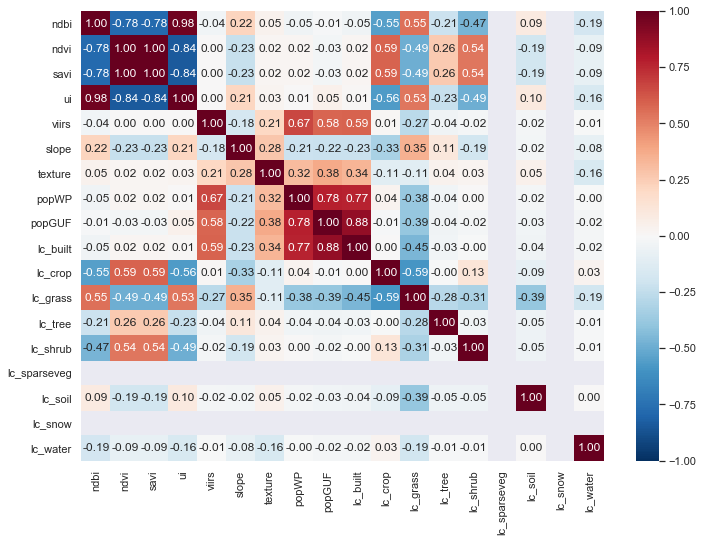

In [97]:
import seaborn as sns
#plot correlation matrix
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(applyFeatureDF.corr(), annot=True, fmt=".2f",cmap='RdBu_r', center=0, vmin=-1, vmax=1)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import math
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats, utils, point_query
import gdal, gdalconst

In [99]:
X_train, X_test, y_train, y_test = train_test_split(applyFeatureDF, applyTargetDF, test_size=0.4, random_state=42)

0.37522176097605686
376.20675689700516


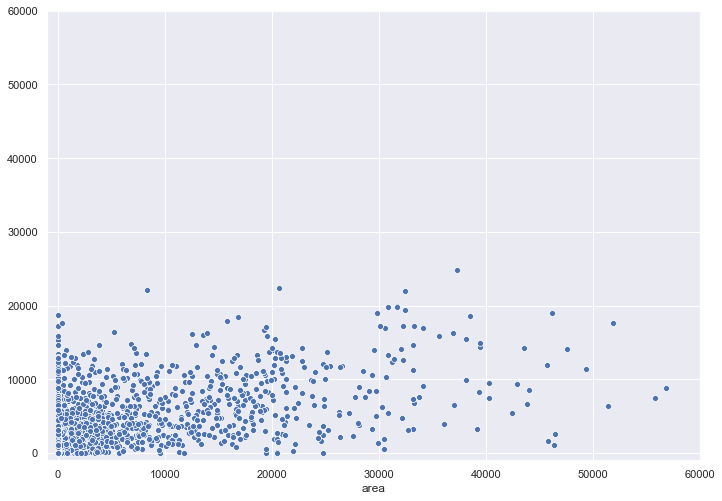

In [100]:
# this is the AFLC with 11 classes

#fit with default settings for reference (70/30 training/test split, no cross validation)
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)
y_pred = RandomForest.predict(X_test)
print(r2_score(y_test,y_pred))
ax1 = sns.scatterplot(x=y_test,y=y_pred)
ax1.set(ylim=(-1000, 60000))
ax1.set(xlim=(-1000, 60000))
print(mean_absolute_error(y_test,y_pred))

0.3088597322992628
393.02293521253165


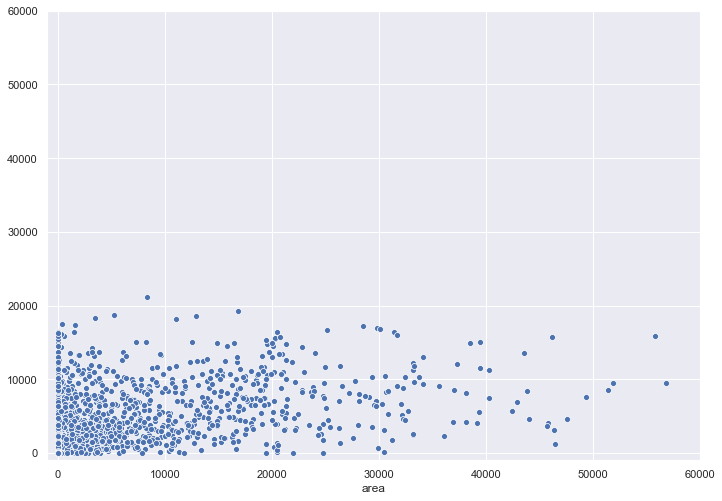

In [28]:
# this is the AFLC with just built area

#fit with default settings for reference (70/30 training/test split, no cross validation)
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)
y_pred = RandomForest.predict(X_test)
print(r2_score(y_test,y_pred))
ax1 = sns.scatterplot(x=y_test,y=y_pred)
ax1.set(ylim=(-1000, 60000))
ax1.set(xlim=(-1000, 60000))
print(mean_absolute_error(y_test,y_pred))

In [102]:
import numpy as np

In [ ]:
#fit with optimized settings (takes a few minutes)

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 43.1min


In [ ]:
# this is testing the results of the model
print(rf_random.best_params_)
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test)
print(r2_score(y_test,y_pred))
ax = sns.scatterplot(x=y_test,y=y_pred)
ax.set(ylim=(-1000, 60000))
ax.set(xlim=(-1000, 60000))
print(mean_absolute_error(y_test,y_pred))

### read in prediction results and check explanatory variables 

In [33]:
with open(r"P:\AFG\GEO\Team\Projects\OSM_Completeness\20200910_AFLC\step4_prediction_kabul_AFLC_multiclass.json",'r') as data:
    x = json.load(data)

In [35]:
polygons=[]
for feature in x['features']:
    g = shape(feature['geometry']).buffer(0)
    polygons.append(g)
print(len(polygons))

76046


In [37]:
def returnFeatureVals(featureString, variable):
    return [x['properties'][featureString] for x in variable['features']]

In [42]:
x

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'parea': 92.4099916684791, 'builtArea': 0.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[68.83210657742687, 34.50047090073892],
      [68.83482979653388, 34.5004746123824],
      [68.83483424286753, 34.49822007567289],
      [68.83211109706794, 34.49821636434044],
      [68.83210657742687, 34.50047090073892]]]}},
  {'type': 'Feature',
   'properties': {'parea': 103.9873026246043, 'builtArea': 0.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[68.83211109706794, 34.49821636434044],
      [68.83483424286753, 34.49822007567289],
      [68.83483868870724, 34.49596553812945],
      [68.83211561620695, 34.49596182710802],
      [68.83211109706794, 34.49821636434044]]]}},
  {'type': 'Feature',
   'properties': {'parea': 513.4336768834661, 'builtArea': 0.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[68.83211561620695, 34.49596182710802],
      [68.83483868870724, 34.495965

In [44]:
applyFeatureDict = {
    'parea':returnFeatureVals('parea',x),
    'builtArea':returnFeatureVals('builtArea',x)
}
applyDF = pd.DataFrame.from_dict(applyFeatureDict)
applyGeoDF = gpd.GeoDataFrame(applyDF,crs = 4326, geometry=polygons)
applyGeoDF = applyGeoDF.fillna(0)

In [64]:
# join features from feature dict 
applyGeoDF.sort_values(by=['parea'], ascending=False)

,parea,builtArea,geometry
42741,41618.441140,46922.972,"POLYGON ((69.36057 34.53613, 69.36329 34.53612..."
34159,41253.893468,0.000,"POLYGON ((69.25444 34.57698, 69.25717 34.57697..."
34630,40812.606732,5331.481,"POLYGON ((69.25979 34.54540, 69.26252 34.54539..."
34173,40684.077160,2212.127,"POLYGON ((69.25434 34.54541, 69.25707 34.54541..."
34624,40273.708850,0.000,"POLYGON ((69.25983 34.55893, 69.26256 34.55892..."
...,...,...,...
73477,0.000000,0.000,"POLYGON ((69.84927 34.63966, 69.85200 34.63964..."
73478,0.000000,0.000,"POLYGON ((69.84925 34.63741, 69.85198 34.63739..."
73480,0.000000,0.000,"POLYGON ((69.84921 34.63290, 69.85193 34.63288..."
36025,0.000000,0.000,"POLYGON ((69.27567 34.40333, 69.27839 34.40332..."


In [68]:
applygdf_join = applyGeoDF.join(applyFeatureDF)
applygdf_join

,parea,builtArea,geometry,ndbi,ndvi,savi,ui,viirs,slope,texture,popWP,popGUF,aflc_built
0,92.409992,0.0,"POLYGON ((68.83211 34.50047, 68.83483 34.50047...",72.610,73.776,110.641,-5.543,0.113,15.455,-1.999,2.351,0,0
1,103.987303,0.0,"POLYGON ((68.83211 34.49822, 68.83483 34.49822...",74.323,75.784,113.656,-1.678,0.115,13.347,-3.853,4.192,0,0
2,513.433677,0.0,"POLYGON ((68.83212 34.49596, 68.83484 34.49597...",14.636,54.584,81.861,-66.348,0.111,14.369,-11.801,4.512,0,0
3,565.654246,0.0,"POLYGON ((68.83212 34.49371, 68.83484 34.49371...",3.767,38.548,57.811,-77.556,0.112,16.554,-8.022,2.377,0,0
4,328.402104,0.0,"POLYGON ((68.83212 34.49145, 68.83485 34.49146...",47.716,58.064,87.082,-22.880,0.112,10.512,-6.964,3.658,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76041,419.715317,0.0,"POLYGON ((69.94352 34.77198, 69.94625 34.77196...",-124.585,338.683,507.955,-268.956,0.109,13.024,-5.148,1.363,0,0
76042,506.807842,0.0,"POLYGON ((69.94349 34.76972, 69.94622 34.76970...",-90.548,298.428,447.581,-218.343,0.088,11.511,-7.418,1.693,0,0
76043,587.409226,0.0,"POLYGON ((69.94346 34.76747, 69.94620 34.76745...",-102.779,285.876,428.749,-238.457,0.082,13.713,-8.733,1.834,0,0
76044,566.041374,0.0,"POLYGON ((69.94344 34.76522, 69.94617 34.76519...",-93.554,243.545,365.263,-219.621,0.088,16.012,-7.955,3.323,0,0


C:\ProgramData\Anaconda3\envs\gostnets0220\osm_completeness\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


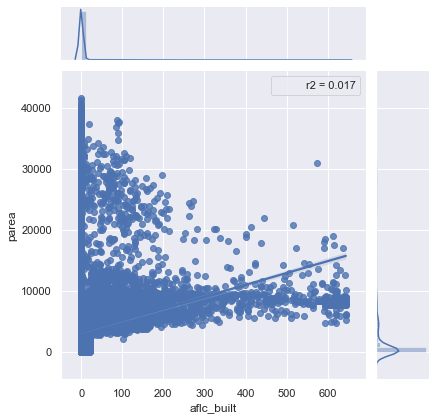

In [84]:
from scipy import stats
def r2(x,y):
    return stats.pearsonr(x,y)[0] ** 2
sns.jointplot(x="aflc_built", y="parea", data=applygdf_join, kind="reg", stat_func=r2)

C:\ProgramData\Anaconda3\envs\gostnets0220\osm_completeness\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


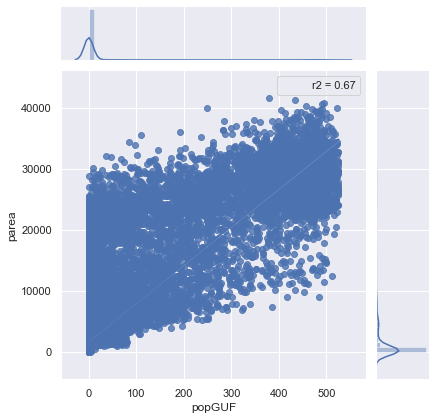

In [83]:
from scipy import stats
def r2(x,y):
    return stats.pearsonr(x,y)[0] ** 2
sns.jointplot(x="popGUF", y="parea", data=applygdf_join, kind="reg", stat_func=r2)